In [23]:
import ipywidgets as widgets
import numpy as np
import lib_dd.decomposition.ccd_single as ccd_single
import lib_dd.config.cfg_single as cfg_single

class ccd_single_app(object):
    def __init__(self, frequency_file, data_file):
        self.frequencies = np.loadtxt(frequency_file)
        self.data = np.loadtxt(data_file)
        self.widgets = []
        self.vbox = None
        self._init_app_widgets()
        
    def _init_app_widgets(self):
        w_lambda = widgets.Text(
            value='10',
            placeholder='10',
            description='Lambda:',
            disabled=False
        )
        
        w_run = widgets.Button(
            description='Run CCD',
            disabled=False,
            tooltip='Run the Cole-Cole decomposition',
        )
        w_run.on_click(self.run_ccd)
        self.widgets = {
            'lambda': (w_lambda, int),
            'run': (w_run, None),
        }
        self.vbox = widgets.VBox([x[0] for x in self.widgets.values()])
        
    def show_app(self):
        display(self.vbox)

    def run_ccd(self, button):
        print('running CCd')
        print('lambda', self.widgets['lambda'][0].value)
        # set options using this dict-like object
        config = cfg_single.cfg_single()
        config['frequency_file'] = self.frequencies
        config['data_file'] = self.data
        config['fixed_lambda'] =  int(self.widgets['lambda'][0].value)

        # generate a ccd object
        ccd_obj = ccd_single.ccd_single(config)

        # commence with the actual fitting
        ccd_obj.fit_data()
        # extract the last iteration
        last_it = ccd_obj.results[0].iterations[-1]
        print('plotting ... this may take a while')
        _ = last_it.plot()
        
        import os
        import shutil
        outdir = 'output'
        if os.path.isdir(outdir):
            shutil.rmtree(outdir)
        ccd_obj.save_to_directory('output')
        
        shutil.make_archive('output', format='zip', root_dir='output/', verbose=True)
        from IPython.core.display import display, HTML
        display(HTML('<a href="output.zip">Download results</a>'))


VBox(children=(Text(value='10', description='Lambda:', placeholder='10'), Button(description='Run CCD', style=ButtonStyle(), tooltip='Run the Cole-Cole decomposition')))

running CCd
lambda 10
single processing
Fitting spectrum 1 of 1
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
RMS update below threshold: 5.060595601248843e-05 - 5.092327593158118e-05 < 1e-05
plotting ... this may take a while
('dd_c', 'c = 1.0')


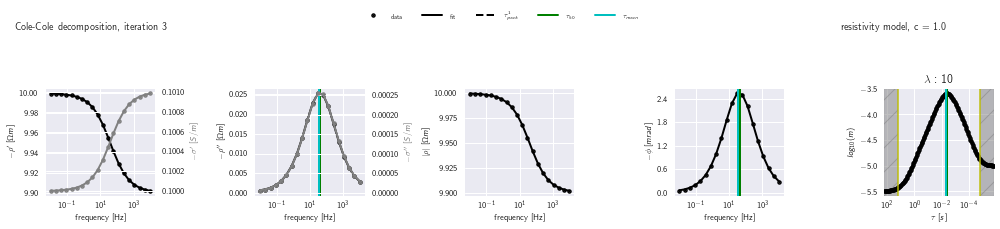

In [24]:
%matplotlib inline
app = ccd_single_app('frequencies.dat', 'data.dat')
app.show_app()

In [7]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))